<a href="https://colab.research.google.com/github/nabiacrypto/Mentalhealth/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import string


import nltk
import re
import warnings

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Combined Data.csv')
df.head(5)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [13]:
df.describe(include='all')

,Unnamed: 0,statement,status
count,53043.000000,52681,53043
unique,NaN,51073,7
top,NaN,what do you mean?,Normal
freq,NaN,22,16351
mean,26521.000000,NaN,NaN
std,15312.339501,NaN,NaN
min,0.000000,NaN,NaN
25%,13260.500000,NaN,NaN
50%,26521.000000,NaN,NaN
75%,39781.500000,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [15]:
df = df.drop('Unnamed: 0',axis = 1)

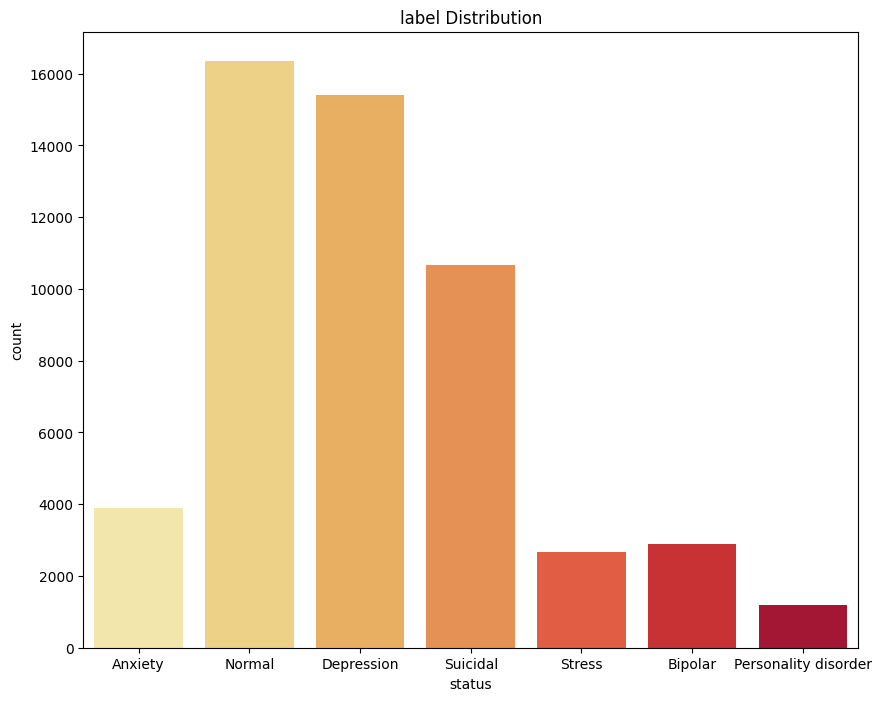

In [16]:
plt.figure(figsize=(10, 8))
sns.countplot(x='status', data=df,palette='YlOrRd')
plt.title('label Distribution')
plt.show()

In [17]:
def remove_missing_values(df):
    return df.dropna()

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

def remove_emojis(text):
    emoji_pattern = re.compile("[\U00010000-\U0010FFFF]", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_emojis(text):
    emoji_pattern = re.compile("[\U00010000-\U0010FFFF]", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_special_chars(text):
    allowed_chars = set(string.ascii_letters + "áéíóúãõàâêôç ")
    return ''.join(c for c in text if c in allowed_chars)

In [18]:
def clean_text(text):
    if not isinstance(text, str):
        return ''

    text = text.lower().strip()
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_emojis(text)
    text = remove_special_chars(text)
    text = re.sub(r'\s+', ' ', text)

    return text

df['statement'] = df['statement'].apply(clean_text)

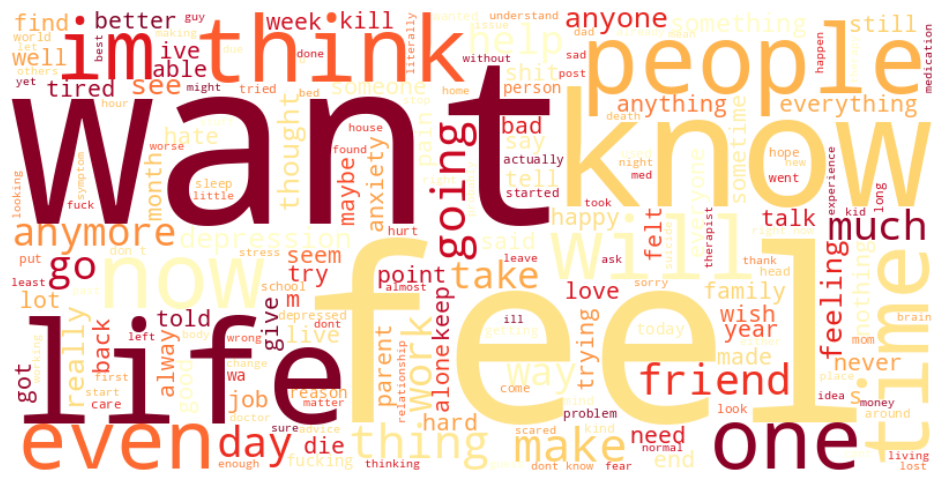

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['statement'])
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='YlOrRd').generate(all_text)

# Plota
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
nltk.download('punkt_tab')
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    return tokens

df['tokenized_statement'] = df['statement'].apply(tokenize_and_remove_stopwords)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [21]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['tokenized_statement'])

sequences = tokenizer.texts_to_sequences(df['tokenized_statement'])

X = pad_sequences(sequences, padding='post', maxlen=100)

In [22]:
encoder = LabelEncoder()
y = df['encoded_status'] = encoder.fit_transform(df['status'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 150s 157ms/step - accuracy: 0.4189 - loss: 1.5220 - val_accuracy: 0.4859 - val_loss: 1.4281
Epoch 2/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 172s 185ms/step - accuracy: 0.5289 - loss: 1.3005 - val_accuracy: 0.5547 - val_loss: 1.1087
Epoch 3/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 188s 170ms/step - accuracy: 0.6071 - loss: 0.9415 - val_accuracy: 0.6716 - val_loss: 0.8352
Epoch 4/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 198s 165ms/step - accuracy: 0.7207 - loss: 0.7063 - val_accuracy: 0.7036 - val_loss: 0.7894
Epoch 5/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 204s 168ms/step - accuracy: 0.7895 - loss: 0.5661 - val_accuracy: 0.7098 - val_loss: 0.7741


Processed data, model, or encoder not found. Starting preprocessing and training...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 162s 170ms/step - accuracy: 0.4523 - loss: 1.4777 - val_accuracy: 0.4517 - val_loss: 1.6530
Epoch 2/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 161s 173ms/step - accuracy: 0.5278 - loss: 1.2938 - val_accuracy: 0.5517 - val_loss: 1.2102
Epoch 3/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 199s 169ms/step - accuracy: 0.5725 - loss: 1.1293 - val_accuracy: 0.5858 - val_loss: 1.0628
Epoch 4/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 202s 170ms/step - accuracy: 0.6391 - loss: 0.8684 - val_accuracy: 0.6756 - val_loss: 0.8379
Epoch 5/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 159s 171ms/step - accuracy: 0.7425 - loss: 0.6592 - val_accuracy: 0.6927 - val_loss: 0.8491


Saving processed data and model...
Finished preprocessing and training.
Evaluating the model...
498/498 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.7093 - loss: 0.8141
Test Loss: 0.8112
Test Accuracy: 0.7092
498/498 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step


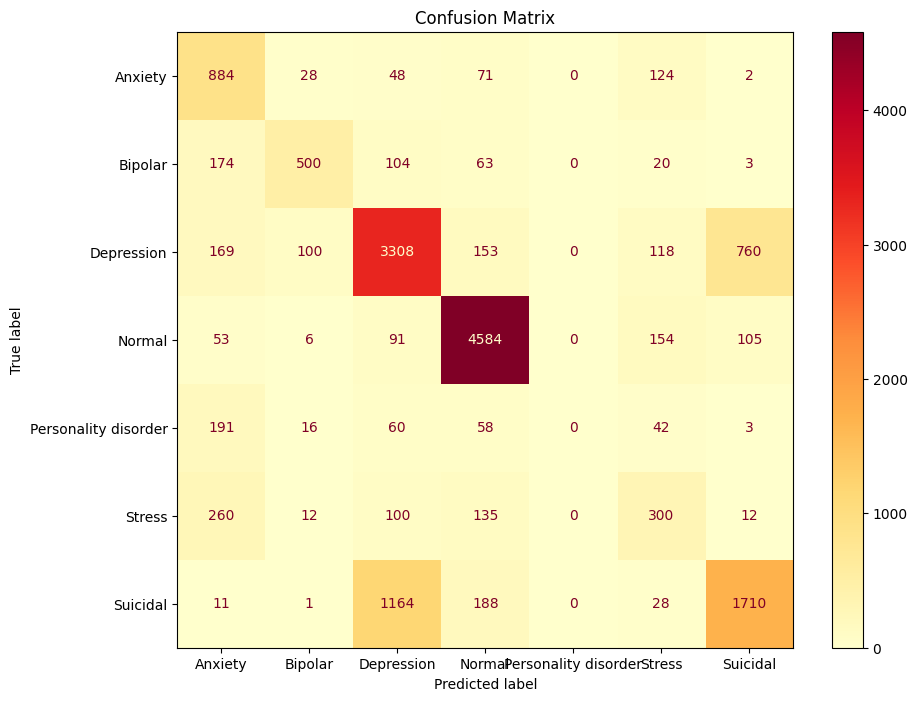

In [25]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import string


import nltk
import re
import warnings

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import load_model from tensorflow.keras.models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os # Import os module to check for files
import pickle # Import pickle to load the encoder

warnings.filterwarnings('ignore')

# Download NLTK resources if needed
# Use LookupError when checking if a resource exists locally
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
     nltk.download('punkt')
# Remove the check and download for 'punkt_tab' as it is not a standard resource
# try:
#     nltk.data.find('tokenizers/punkt_tab')
# except LookupError:
#      print("Warning: 'punkt_tab' not found. This might be a typo or requires a custom download.")
#      pass


# %%
# Define file paths for saving/loading
PROCESSED_DATA_DIR = '/content/processed_data'
MODEL_SAVE_PATH = '/content/drive/MyDrive/my_sentiment_model.h5' # Using .h5 format for simplicity
X_TRAIN_PATH = os.path.join(PROCESSED_DATA_DIR, 'X_train.npy')
X_TEST_PATH = os.path.join(PROCESSED_DATA_DIR, 'X_test.npy')
Y_TRAIN_PATH = os.path.join(PROCESSED_DATA_DIR, 'y_train.npy')
Y_TEST_PATH = os.path.join(PROCESSED_DATA_DIR, 'y_test.npy')
LABEL_ENCODER_PATH = os.path.join(PROCESSED_DATA_DIR, 'label_encoder.pkl') # Save the encoder too

# Create the directory if it doesn't exist
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

# %%
# Check if processed data and model exist
if os.path.exists(X_TRAIN_PATH) and os.path.exists(MODEL_SAVE_PATH) and os.path.exists(LABEL_ENCODER_PATH):
    print("Loading processed data and model from files...")
    try:
        X_train = np.load(X_TRAIN_PATH)
        X_test = np.load(X_TEST_PATH)
        y_train = np.load(Y_TRAIN_PATH)
        y_test = np.load(Y_TEST_PATH)
        model = load_model(MODEL_SAVE_PATH)

        # Load the LabelEncoder
        with open(LABEL_ENCODER_PATH, 'rb') as f:
            encoder = pickle.load(f)

        print("Loaded data and model.")
    except Exception as e:
        print(f"Error loading saved data/model: {e}")
        print("Proceeding with reprocessing and training.")
        # If loading fails, fall through to the 'else' block for reprocessing
        # The else block starts here
        pass # This allows the code to continue to the 'else' block if loading fails

else:
    print("Processed data, model, or encoder not found. Starting preprocessing and training...")
    # %%
    # --- Data Loading and Preprocessing (Keep this block) ---
    df = pd.read_csv('/content/drive/MyDrive/Combined Data.csv')
    # df.head(5) # Optional: display head
    # df.describe(include='all') # Optional: display describe
    # df.info() # Optional: display info
    df = df.drop('Unnamed: 0',axis = 1)

    # Optional: Plot distribution (if you want to see it each time)
    # plt.figure(figsize=(10, 8))
    # sns.countplot(x='status', data=df,palette='YlOrRd')
    # plt.title('label Distribution')
    # plt.show()

    # %%
    # Clean Text
    def remove_missing_values(df):
        return df.dropna()

    def remove_urls(text):
        return re.sub(r'http\S+', '', text)

    def remove_mentions(text):
        return re.sub(r'@\w+', '', text)

    def remove_emojis(text):
        emoji_pattern = re.compile("[\U00010000-\U0010FFFF]", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    def remove_special_chars(text):
        allowed_chars = set(string.ascii_letters + "áéíóúãõàâêôç ")
        return ''.join(c for c in text if c in allowed_chars)

    def clean_text(text):
        if not isinstance(text, str):
            return ''

        text = text.lower().strip()
        text = remove_urls(text)
        text = remove_mentions(text)
        text = remove_emojis(text)
        text = remove_special_chars(text)
        text = re.sub(r'\s+', ' ', text)

        return text

    df['statement'] = df['statement'].apply(clean_text)

    # %%
    # Tokenization and Stopword Removal
    # Ensure stopwords are loaded before using them
    from nltk.corpus import stopwords # Re-import or ensure it's available here
    # Check if 'stopwords' is available, otherwise download
    try:
        stopwords_list = stopwords.words('english')
    except LookupError:
        print("Downloading stopwords...")
        nltk.download('stopwords')
        stopwords_list = stopwords.words('english')

    stopwords_set = set(stopwords_list)


    def tokenize_and_remove_stopwords(text):
        # Ensure 'punkt' tokenizer is available before calling word_tokenize
        try:
            nltk.data.find('tokenizers/punkt')
        except LookupError:
             print("Downloading punkt tokenizer...")
             nltk.download('punkt')

        tokens = word_tokenize(text)
        # Use the stopwords_set for faster lookup
        tokens = [word for word in tokens if word.lower() not in stopwords_set]
        return tokens

    df['tokenized_statement'] = df['statement'].apply(tokenize_and_remove_stopwords)

    # %%
    # Text Vectorization (Tokenization and Padding)
    # Define num_words and maxlen as variables for clarity
    VOCAB_SIZE = 10000
    MAX_LEN = 100 # Use the length defined later in pad_sequences

    tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>") # Add OOV token
    # Fit on the joined tokens for a better vocabulary build
    tokenizer.fit_on_texts([' '.join(tokens) for tokens in df['tokenized_statement']])

    sequences = tokenizer.texts_to_sequences([' '.join(tokens) for tokens in df['tokenized_statement']])

    X = pad_sequences(sequences, padding='post', maxlen=MAX_LEN)

    # %%
    # Label Encoding
    encoder = LabelEncoder()
    # Ensure the column name is correct and consistent
    df['encoded_status'] = encoder.fit_transform(df['status'])
    y = df['encoded_status'] # Assign the encoded column to y

    # %%
    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # %%
    # Build the Model
    # Ensure input_length matches MAX_LEN used in pad_sequences
    model = Sequential([
        Embedding(input_dim=VOCAB_SIZE, output_dim=64, input_length=MAX_LEN), # Use MAX_LEN here
        LSTM(128, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        # Ensure output layer size matches the number of classes
        # Number of classes is the number of unique values in y
        Dense(len(encoder.classes_), activation='softmax') # Use number of classes from encoder
    ])

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    # Print model summary to verify layers
    model.summary()

    # %%
    # Train the Model
    print("Training the model...")
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2
    )

    # %%
    # Save processed data and model
    print("Saving processed data and model...")
    np.save(X_TRAIN_PATH, X_train)
    np.save(X_TEST_PATH, X_test)
    np.save(Y_TRAIN_PATH, y_train)
    np.save(Y_TEST_PATH, y_test)
    model.save(MODEL_SAVE_PATH)

    # Save the LabelEncoder
    with open(LABEL_ENCODER_PATH, 'wb') as f:
        pickle.dump(encoder, f)

    print("Finished preprocessing and training.")


# %%
# Evaluate the Model (can be run regardless of whether model was loaded or trained)
print("Evaluating the model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# %%
# Display Confusion Matrix (Optional)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
# Use the classes from the encoder for labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap=plt.cm.YlOrRd)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
encoder = LabelEncoder()
y = df['encoded_status'] = encoder.fit_transform(df['status'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

NameError: name 'Sequential' is not defined

In [26]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 158s 170ms/step - accuracy: 0.7958 - loss: 0.5447 - val_accuracy: 0.6910 - val_loss: 0.8509
Epoch 2/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 207s 175ms/step - accuracy: 0.8254 - loss: 0.4735 - val_accuracy: 0.6954 - val_loss: 0.9124
Epoch 3/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 186s 159ms/step - accuracy: 0.8590 - loss: 0.4016 - val_accuracy: 0.6981 - val_loss: 0.9711
Epoch 4/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 212s 169ms/step - accuracy: 0.8842 - loss: 0.3304 - val_accuracy: 0.6813 - val_loss: 1.0595
Epoch 5/5
929/929 ━━━━━━━━━━━━━━━━━━━━ 192s 158ms/step - accuracy: 0.9058 - loss: 0.2758 - val_accuracy: 0.6826 - val_loss: 1.1350
